# **CLASE 4 - INTRO A MACHINE LEARNING**

## **DIVISIÓN DE DATOS**

### Importamos librerías

In [ ]:
# importar pandas
import pandas as pd

### Carga del dataset "salarios_dataset.csv"

In [ ]:
# Cargar el dataset

data = pd.read_csv("/content/salarios_dataset.csv")

In [ ]:
data.head()

,Edad,AñosdeExperiencia,Salario
0,41,9.4,55414
1,54,23.8,82290
2,50,18.3,73246
3,46,15.0,58172
4,32,3.9,42518


### Arrancamos con la división de datos

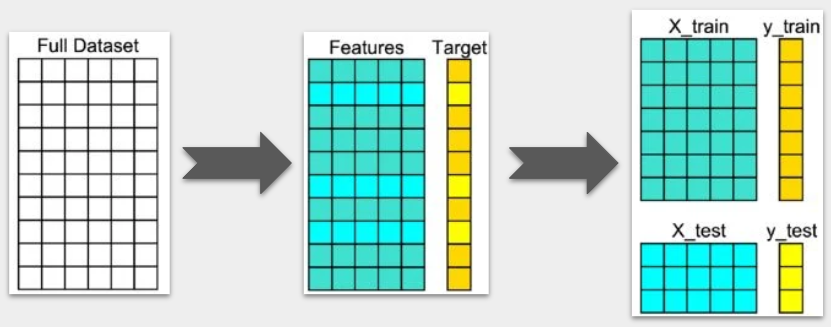

### Definimos el target (y)

In [ ]:
# 1. Definir el target (y)
# Seleccionamos la columna que queremos predecir
y = data['Salario']

In [ ]:
# Observamos los valores de y
y.head()

,Salario
0,55414
1,82290
2,73246
3,58172
4,42518


### Definimos las features (X)

In [ ]:
# 2. Definir las features (X)

# Usamos .drop() para quitar la columna target de los datos
# 'axis=1' significa que estamos borrando una COLUMNA, no una fila.
X = data.drop('Salario', axis=1)

In [ ]:
# Verificamos cómo quedó X
X.head()

,Edad,AñosdeExperiencia
0,41,9.4
1,54,23.8
2,50,18.3
3,46,15.0
4,32,3.9


### Alternativa 2

In [ ]:
# 1. Definir el target (y)
# Seleccionamos la columna que queremos predecir
y_2 = data['Salario']
y_2.head()

,Salario
0,55414
1,82290
2,73246
3,58172
4,42518


In [ ]:
# Separamos con los nombres de las columnas
X_2 = data[['Edad', 'AñosdeExperiencia']]
X_2.head()

,Edad,AñosdeExperiencia
0,41,9.4
1,54,23.8
2,50,18.3
3,46,15.0
4,32,3.9


### Alternatva 3

In [ ]:
# ILOC
# Selecciona TODAS las filas (:) y SOLAMENTE la última columna (-1)
y_3 = data.iloc[:, -1]
y_3.head()

,Salario
0,55414
1,82290
2,73246
3,58172
4,42518


In [ ]:
# Selecciona TODAS las filas (:) y TODAS las columnas EXCEPTO la última (:-1)
X_3 = data.iloc[:, :-1]
X_3.head()

,Edad,AñosdeExperiencia
0,41,9.4
1,54,23.8
2,50,18.3
3,46,15.0
4,32,3.9


**VOLVEMOS AL PPT**



---



### **train_test_split**

In [1]:
# importar pandas
import pandas as pd

# Importamos train_test_split de la parte de model_selection de sklearn
from sklearn.model_selection import train_test_split

In [2]:
# Cargar el dataset
data = pd.read_csv("/content/salarios_dataset.csv")

In [3]:
# 1. Definir el target (y)
# Seleccionamos la columna que queremos predecir
y = data['Salario']

In [4]:
y.head(3)

,Salario
0,55414
1,82290
2,73246


In [5]:
# 2. Definir las features (X)
# Separamos con los nombres de las columnas
X = data[['Edad', 'AñosdeExperiencia']]

In [ ]:
X.head(3)

,Edad,AñosdeExperiencia
0,41,9.4
1,54,23.8
2,50,18.3


In [6]:
# 3. Dividir en Train y Test (20% test, con random_state y estratificación)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=28)

In [7]:
# 4. Visualizar y Verificar los Resultados

print("--- Verificando los resultados de la división ---")
print(f"Total de filas originales: {len(data)}")
print("-" * 20)
print(f"Filas en X_train (Entrenamiento): {len(X_train)}  -> ({len(X_train)/len(data)*100:.0f}%)")
print(f"Filas en X_test (Testeo): {len(X_test)}   -> ({len(X_test)/len(data)*100:.0f}%)")
print("-" * 20)
print(f"Filas en y_train (Entrenamiento): {len(y_train)}  -> ({len(y_train)/len(data)*100:.0f}%)")
print(f"Filas en y_test (Testeo): {len(y_test)}  -> ({len(y_test)/len(data)*100:.0f}%)")
print("-" * 30 + "\n")

--- Verificando los resultados de la división ---
Total de filas originales: 50
--------------------
Filas en X_train (Entrenamiento): 40  -> (80%)
Filas en X_test (Testeo): 10   -> (20%)
--------------------
Filas en y_train (Entrenamiento): 40  -> (80%)
Filas en y_test (Testeo): 10  -> (20%)
------------------------------



## **Entrenando un modelo de Regresión Lineal Simple**

### Importamos las librerías y cargamos el datset

In [18]:
# importar pandas
import pandas as pd

# Importamos train_test_split de la parte de model_selection de sklearn
from sklearn.model_selection import train_test_split

# Cargar el dataset
data = pd.read_csv("/content/salarios_dataset.csv")

### Dividimos en X e y. Utilizamos train_test_split

In [19]:
# 1. Definir el target (y)
# Seleccionamos la columna que queremos predecir
y = data['Salario']

# 2. Definir las features (X)
# Separamos con los nombres de las columnas
# Utilzamos una sola columna porque vamos a entrenar una Regresión Lineal Simple
X = data[['AñosdeExperiencia']]

# 3. Dividir en Train y Test (20% test, con random_state y estratificación)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=28)

### Llamamos al modelo de Regresión Lineal

In [20]:
# Importamos LinearRegression de la parte de modelos lineales de SKlearn
from sklearn.linear_model import LinearRegression
# 1. Creamos una instancia del modelo
regressor = LinearRegression()

In [21]:
# Ajustamos (entrenamos) el modelo con los datos de entrenamiento
regressor.fit(X_train, y_train)

LinearRegression()

### Graficamos los datos de entrenamiento con la predicción

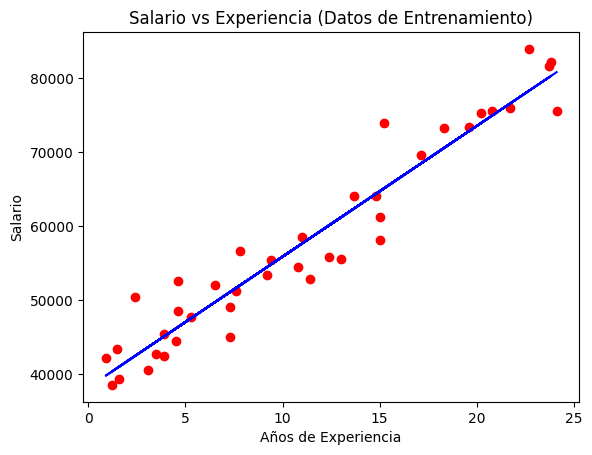

In [22]:
import matplotlib.pyplot as plt

# 1. Graficar los puntos de datos REALES (rojo)
plt.scatter(X_train, y_train, color='red')

# 2. Graficar la LÍNEA de predicción que aprendió el modelo (azul)
# Usamos .predict() sobre X_train para ver qué predice el modelo
plt.plot(X_train, regressor.predict(X_train), color='blue')

plt.title('Salario vs Experiencia (Datos de Entrenamiento)')
plt.xlabel('Años de Experiencia')
plt.ylabel('Salario')
plt.show()

### Graficamos los datos de testeo con la predicción

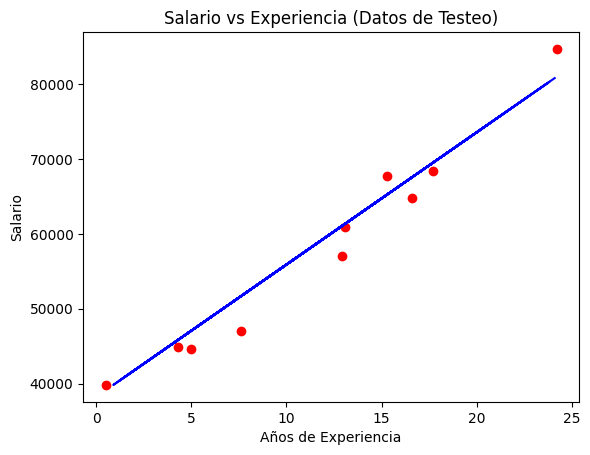

In [25]:
# 1. Graficar los puntos de datos de TEST (rojo)
plt.scatter(X_test, y_test, color='red')

# 2. Graficar la MISMA LÍNEA de modelo (azul)
plt.plot(X_train, regressor.predict(X_train), color='blue')

plt.title('Salario vs Experiencia (Datos de Testeo)')
plt.xlabel('Años de Experiencia')
plt.ylabel('Salario')
plt.show()


### **Calculamos el R-Cuadrado (R²)**

In [26]:
# Calculamos el R-cuadrado sobre los datos de TEST
score_r2 = regressor.score(X_test, y_test)
print(f"El R-cuadrado (R²) del modelo es: {score_r2:.2f}")

El R-cuadrado (R²) del modelo es: 0.96


**Un R² = 0.96 (o 96%) significa:**
* El **96%** de las diferencias que vemos en los salarios de las personas se puede explicar por la diferencia en sus años de experiencia.

* El **4%** restante se debe a otros factores que no están en el modelo (educación, ciudad, habilidades, etc.).

**Rango:**
* **R² = 1 (100%):** El modelo es perfecto, explica toda la variabilidad. (Casi nunca pasa).
* **R² = 0 (0%):** El modelo no explica nada de la variabilidad de los salarios.





---

---





---



## **REGRESIÓN LOGÍSTICA**

### Importamos librerías

In [62]:
# importar numpy
import numpy as np

# importar pandas
import pandas as pd

# importar matplotlib
import matplotlib.pyplot as plt

### Carga de datos

In [63]:
data = pd.read_csv("/content/diabetes.csv")

In [64]:
data.head(3)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1


### División de datos

In [65]:
# Creamos una variable para nuestra columna target (variable dependiente)
y = data['Outcome']

In [66]:
# Creamos otra variable para la variable independiente
X = data[['BMI']]

In [67]:
# importamos train_test_split de sklearn
from sklearn.model_selection import train_test_split

In [68]:
# Utilizamos train_test_split para dividir nuestros datos en datos de testeo y datos de entrenamiento

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=28, stratify=y)

### Selección del modelo de Regresión Logística

In [69]:
# Importamos de sklearn el modelo LogisticRegression
from sklearn.linear_model import LogisticRegression

# Llamamos al modelo
modelo = LogisticRegression()

In [70]:
# Entrenamos el modelo con .fit
modelo.fit(X_train, y_train)

LogisticRegression()

### Evaluar modelo

In [71]:
# Para regresión logística el score es el accuracy (exactitud)
# Datos de entrenamiento
modelo.score(X_train, y_train)

0.6596091205211726

In [72]:
# Accuracy (exactitud)
# Datos de testeo
modelo.score(X_test, y_test)

0.6948051948051948

### Regresión logística con 2 variables

In [73]:
# Creamos una variable para nuestra columna target (variable dependiente)
y_2 = data['Outcome']

In [74]:
# Creamos otra variable para la variable independiente
X_2 = data[["BMI", "Glucose", "Age", "Insulin", "SkinThickness"]]

In [75]:
# Utilizamos train_test_split para dividir nuestros datos en datos de testeo y datos de entrenamiento
X_train, X_test, y_train, y_test = train_test_split(X_2,y_2, test_size=0.2, random_state=42, stratify=y)

In [76]:
# Llamamos al modelo
modelo_2 = LogisticRegression()

In [77]:
# Entrenamos el modelo con .fit
modelo_2.fit(X_train, y_train)

LogisticRegression()

In [78]:
# Para regresión logística el score es el accuracy (exactitud)
# Datos de entrenamiento
modelo_2.score(X_train, y_train)

0.7785016286644951

In [79]:
# Accuracy (exactitud)
# Datos de testeo
modelo_2.score(X_test, y_test)

0.7402597402597403



---

